In [1]:
from datasets import load_dataset
dataset = load_dataset('imdb')
dataset = dataset.map(lambda x: {"label": 1 if x["label"] == "pos" else 0})

ModuleNotFoundError: No module named 'datasets'

In [2]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

ModuleNotFoundError: No module named 'transformers'

In [3]:
def tokenizar(muestra):
    return tokenizer(muestra["text"], padding = "max_length", truncation = True)

In [4]:
tokenized_datasets = dataset.map(tokenizar, batched = True)

NameError: name 'dataset' is not defined

In [5]:
from torch.utils.data import DataLoader

ModuleNotFoundError: No module named 'torch'

In [6]:
train_dataset = tokenized_datasets['train'].shuffle(seed=42).select(range(10000))
val_dataset = tokenized_datasets['test'].shuffle(seed=42).select(range(1000))
train_dataloader = DataLoader(train_dataset, batch_size=8)
val_dataloader = DataLoader(val_dataset, batch_size=8)

NameError: name 'tokenized_datasets' is not defined

In [7]:
from transformers import BertForSequenceClassification

ModuleNotFoundError: No module named 'transformers'

In [8]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 2)

NameError: name 'BertForSequenceClassification' is not defined

In [9]:
# import AdamW
from torch.optim import AdamW

ModuleNotFoundError: No module named 'torch'

In [10]:
optimizer = AdamW(model.parameters(), lr=5e-5)

NameError: name 'AdamW' is not defined

In [11]:
from torch import optim

ModuleNotFoundError: No module named 'torch'

In [12]:
optimizer = optim.AdamW(model.parameters(), lr=5e-5)

NameError: name 'optim' is not defined

In [14]:
from transformers import Trainer, TrainingArguments

ModuleNotFoundError: No module named 'transformers'

In [16]:
import torch
torch.cuda.empty_cache()

ModuleNotFoundError: No module named 'torch'

In [16]:
training_args = TrainingArguments(
    output_dir = './results',
    eval_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    num_train_epochs = 3,
    weight_decay = 0.01,
)

In [17]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset = val_dataset,
)

In [18]:
results = trainer.evaluate()
print(results)

C:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.9968429803848267, 'eval_model_preparation_time': 0.0052, 'eval_runtime': 793.5341, 'eval_samples_per_second': 1.26, 'eval_steps_per_second': 0.315}


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [21]:
text = ["Me encanta este producto", "No me gustó para nada"]

In [22]:
inputs = tokenizer(text, return_tensors = "pt", padding = True, truncation = True).to(device)
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)
print(predictions)

tensor([1, 1])


In [23]:
print(inputs)

{'input_ids': tensor([[  101,  2033,  4372,  9336,  2696, 28517,  4031,  2080,   102],
        [  101,  2053,  2033, 26903,  2080, 11498, 23233,  2050,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [24]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [25]:
print(f"Dispositivo de los inputs (input_ids): **{inputs['input_ids'].device}**")
print(f"Dispositivo del modelo: **{next(model.parameters()).device}**")

Dispositivo de los inputs (input_ids): **cpu**
Dispositivo del modelo: **cpu**


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

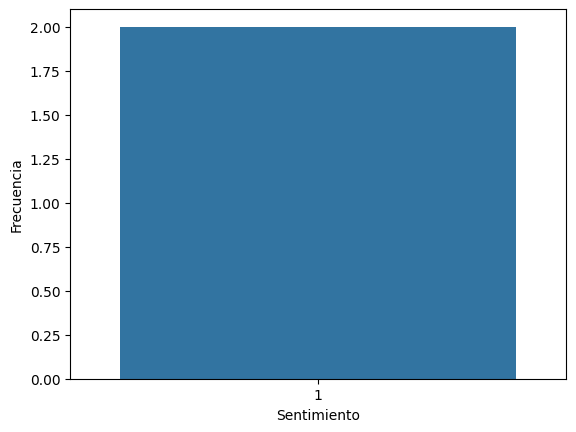

In [28]:
sns.countplot(x=predictions.cpu().numpy())
plt.xlabel("Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

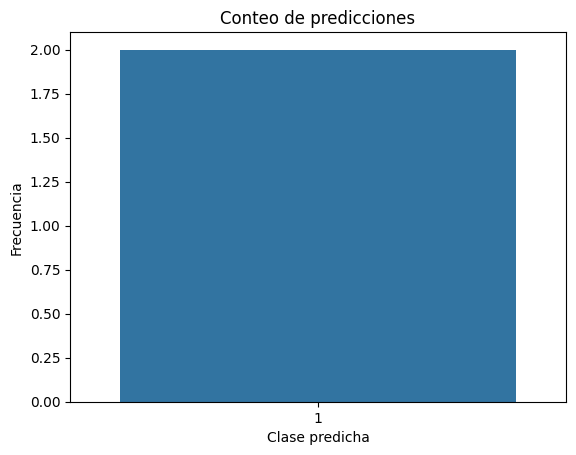

In [29]:
sns.countplot(x=predictions.numpy())
plt.title("Conteo de predicciones")
plt.xlabel("Clase predicha")
plt.ylabel("Frecuencia")
plt.show()

In [30]:
texts = [
    "I absolutely love this product! It exceeded all my expectations.",
    "Great experience overall, the customer support was very helpful.",
    "The design is sleek and modern, really impressed with the quality.",
    "Fast delivery and everything arrived in perfect condition!",
    "This update made the app so much smoother, great job!",
    "I'm disappointed, it stopped working after just a few days.",
    "Poor quality for the price, I wouldn’t recommend it.",
    "The interface is confusing and hard to navigate.",
    "Customer service took too long to respond to my issue.",
    "The product didn’t match the description at all, very frustrating."
]


In [32]:
inputs = tokenizer(texts, return_tensors = "pt", padding = True, truncation = True).to(device)
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)
print(predictions)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


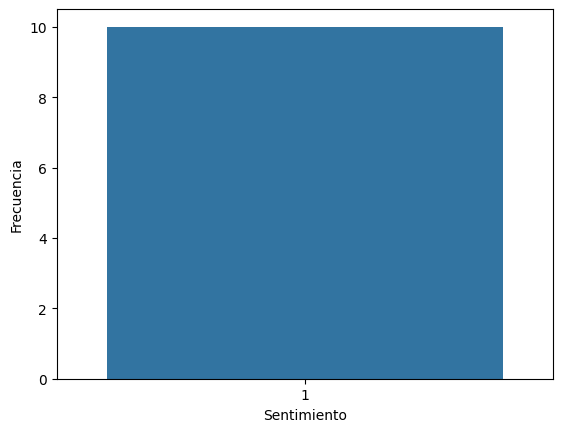

In [33]:
sns.countplot(x=predictions.cpu().numpy())
plt.xlabel("Sentimiento")
plt.ylabel("Frecuencia")
plt.show()

In [35]:
# Remplazar el modelo base a español
from transformers import AutoTokenizer, AutoModelForSequeceClassification
MODEl_NAME_ES = "openai/whisper-large-v3"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME_ES)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME_ES)

ImportError: cannot import name 'AutoModelForSequeceClassification' from 'transformers' (C:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\__init__.py)